In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [76]:
dataset = pd.DataFrame(pd.read_csv("./spambase.data").values[:, ])
print(dataset.shape)
print(type(dataset))
dataset.head()

(4600, 58)
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0


In [77]:
print(dataset.describe())

                0            1            2            3            4   \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      0.104576     0.212922     0.280578     0.065439     0.312222   
std       0.305387     1.290700     0.504170     1.395303     0.672586   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.382500   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

                5            6            7            8            9   ...  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000  ...   
mean      0.095922     0.114233     0.105317     0.090087     0.239465  ...   
std       0.273850     0.391480     0.401112     0.278643     0.644816  ...   
min       0.00000

In [78]:
n = len(dataset[dataset[57] == 1])
p =  (n/4600)*100
print("No of spam in Dataset:", n)
print("Percent of spam in Dataset:", p)
n1 = len(dataset[dataset[57] == 0])
p1 =  (n1/4600)*100
print("No of not spam in Dataset:",n1)
print("Percent of not spam in Dataset:",p1)



No of spam in Dataset: 1812
Percent of spam in Dataset: 39.391304347826086
No of not spam in Dataset: 2788
Percent of not spam in Dataset: 60.608695652173914


In [79]:
dataset = dataset.to_numpy()
print(type(dataset))
#fix missing values
imputer = SimpleImputer(missing_values = 0, strategy ="mean")
imputer = imputer.fit(dataset[:, :-1])
dataset[:, :-1] = imputer.transform(dataset[:, :-1])
print(pd.DataFrame(dataset).describe())


<class 'numpy.ndarray'>
                0            1            2            3            4   \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      0.456838     1.091906     0.683975     6.404681     0.822106   
std       0.237518     1.216023     0.375471     1.237718     0.541424   
min       0.010000     0.010000     0.030000     0.040000     0.020000   
25%       0.456838     1.091906     0.650000     6.404681     0.822106   
50%       0.456838     1.091906     0.683975     6.404681     0.822106   
75%       0.456838     1.091906     0.683975     6.404681     0.822106   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

                5            6            7            8            9   ...  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000  ...   
mean      0.441682     0.651140     0.587937     0.536093     0.846037  ...   
std       0.204501     0.303169     0.331740     0.193530     0.520099  

In [80]:
sc = StandardScaler()
dataset[:, :-1] = sc.fit_transform(dataset[:, :-1])
print(pd.DataFrame(dataset).describe())

                 0             1             2            3             4   \
count  4.600000e+03  4.600000e+03  4.600000e+03  4600.000000  4.600000e+03   
mean   6.487564e-17  1.235726e-17  6.178632e-18     0.000000  2.316987e-17   
std    1.000109e+00  1.000109e+00  1.000109e+00     1.000109  1.000109e+00   
min   -1.881480e+00 -8.898057e-01 -1.741934e+00    -5.142831 -1.481636e+00   
25%    0.000000e+00  0.000000e+00 -9.049505e-02     0.000000  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
max    1.719280e+01  1.084645e+01  1.176258e+01    29.416464  1.695324e+01   

                 5             6             7             8             9   \
count  4.600000e+03  4.600000e+03  4.600000e+03  4.600000e+03  4.600000e+03   
mean  -2.471453e-17 -3.089316e-18  3.861645e-17  2.316987e-17  1.235726e-17   
std    1.000109e+00  1.000109e+00  1.000109e+00  1.000109e+0

In [81]:
# split dataset into test set, train set and unlabel pool
def split(dataset, train_size, test_size):
	x = dataset[:, :-1]
	y = dataset[:, -1]
	x_train, x_pool, y_train, y_pool = train_test_split(
		x, y, train_size = train_size)
	unlabel, x_test, label, y_test = train_test_split(
		x_pool, y_pool, test_size = test_size)
	return x_train, y_train, x_test, y_test, unlabel, label

In [82]:
ac1, ac2 ,ac3= [], [], []# arrays to store accuracy of different 

In [83]:

from sklearn.metrics import accuracy_score

# split dataset into train(5 %), test(25 %), unlabel(70 %)
x_train, y_train, x_test, y_test, unlabel, label = split(
	dataset, 0.05, 0.25)
# train model by active learning
for i in range(20):
	classifier1 = LogisticRegression()
	classifier1.fit(x_train, y_train)
	y_probab = classifier1.predict_proba(unlabel)[:, 0]
	p = 0.47 # range of uncertanity 0.47 to 0.53
	for i in range(unlabel.shape[0]):
		if(y_probab[i] >= p and y_probab[i] <= 1-p):
			uncrt_pt_ind.append(i)
			break
	x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0)
	y_train = np.append(label[uncrt_pt_ind], y_train)
	unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0)
	label = np.delete(label, uncrt_pt_ind)
	ac1.append(classifier1.score(x_test, y_test))

classifier2 = LogisticRegression()
classifier2.fit(x_train, y_train)
ac2.append(classifier2.score(x_test, y_test))


''' split dataset into train(same as generated by our model),
test(25 %), unlabel(rest) '''
train_size = x_train.shape[0]/dataset.shape[0]
x_train, y_train, x_test, y_test, unlabel, label = split(
	dataset, train_size, 0.25)
# train model without active learning
classifier3 = LogisticRegression()
results = classifier3.fit(x_train, y_train)
ac3.append(classifier3.score(x_test, y_test))

print(ac1)
print(ac2)
print(ac3)

[0.7191216834400732, 0.7365050320219579, 0.7383348581884721, 0.747483989021043, 0.7511436413540714, 0.757548032936871, 0.7657822506861848, 0.7694419030192132, 0.7749313815187557, 0.787740164684355, 0.7712717291857274, 0.7749313815187557, 0.7612076852698993, 0.7566331198536139, 0.7630375114364135, 0.7630375114364135, 0.7758462946020128, 0.7804208600182982, 0.777676120768527, 0.7703568161024703]
[0.7703568161024703]
[0.7413793103448276]


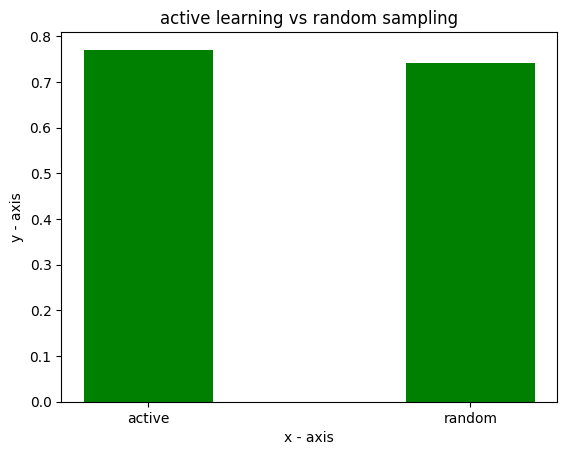

In [87]:
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2]
  
# heights of bars
height = []
height.append(ac2[0])
height.append(ac3[0])
  
# labels for bars
tick_label = ['active','random']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.4, color = ['green', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('active learning vs random sampling')
  
# function to show the plot
plt.show()